In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
from sklearn.preprocessing import LabelEncoder

In [270]:
ds = pd.read_csv(r'C:\Users\jayak\OneDrive\Desktop\Data Analytics\Regression Model\Mall_Customers.csv')

In [271]:
ds = ds.drop(['CustomerID'], axis=1)

In [272]:
ds['Gender'] = LabelEncoder().fit_transform(ds['Gender'])

In [273]:
ds.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [274]:
scaler = MinMaxScaler()
ds_scaled = pd.DataFrame(scaler.fit_transform(ds), columns=ds.columns)

In [275]:
ds_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


In [276]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
outlier = iso.fit_predict(ds_scaled)
ds_scaled['outlier'] = outlier

clean_data = ds_scaled[ds_scaled['outlier'] == 1]



In [277]:
clean_data

,Gender,Age,Annual Income (k$),Spending Score (1-100),outlier
3,0.0,0.096154,0.008197,0.775510,1
4,0.0,0.250000,0.016393,0.397959,1
5,0.0,0.076923,0.016393,0.765306,1
6,0.0,0.326923,0.024590,0.051020,1
7,0.0,0.096154,0.024590,0.948980,1
...,...,...,...,...,...
187,1.0,0.192308,0.704918,0.683673,1
188,0.0,0.442308,0.721311,0.163265,1
189,0.0,0.346154,0.721311,0.857143,1
190,0.0,0.307692,0.721311,0.224490,1


In [278]:
X = clean_data.drop(['Spending Score (1-100)'], axis=1)
y = clean_data['Spending Score (1-100)']

In [279]:
X.shape, y.shape

((180, 4), (180,))

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [281]:
X_train.shape, y_train.shape

((144, 4), (144,))

In [282]:
X_test.shape, y_test.shape

((36, 4), (36,))

In [283]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [284]:
y_pred = lr.predict(X_test)
y_pred

array([0.39944378, 0.63682837, 0.54987718, 0.495944  , 0.53097249,
       0.48837176, 0.5139077 , 0.54547834, 0.45829545, 0.45352337,
       0.58115011, 0.39480372, 0.47711973, 0.60978857, 0.52842796,
       0.3423228 , 0.52722181, 0.45918483, 0.59877777, 0.60890407,
       0.55330622, 0.34376065, 0.43151129, 0.64392768, 0.56989807,
       0.35356531, 0.4657164 , 0.49945345, 0.4558218 , 0.49388681,
       0.48694832, 0.53536645, 0.46532875, 0.55099339, 0.49731585,
       0.60435394])

In [285]:
print('Coefficient:', lr.coef_)
print('Intercept:', lr.intercept_)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Coefficient: [-0.04188657 -0.2447156  -0.14598761  0.        ]
Intercept: 0.6710478839644545
Mean Squared Error: 0.06011472713332717
R2 Score: -0.004703737515593165


In [286]:
y_test

116    0.428571
13     0.775510
135    0.887755
171    0.755102
147    0.744898
81     0.551020
66     0.500000
162    0.040816
173    0.928571
118    0.428571
43     0.612245
164    0.255102
169    0.632653
9      0.724490
26     0.316327
102    0.591837
175    0.867347
154    0.153061
47     0.469388
111    0.540816
155    0.897959
70     0.551020
73     0.561224
7      0.948980
132    0.336735
176    0.142857
123    0.918367
177    0.693878
179    0.908163
71     0.418367
54     0.448980
36     0.163265
117    0.591837
142    0.397959
76     0.530612
15     0.795918
Name: Spending Score (1-100), dtype: float64

In [287]:

y_pred


array([0.39944378, 0.63682837, 0.54987718, 0.495944  , 0.53097249,
       0.48837176, 0.5139077 , 0.54547834, 0.45829545, 0.45352337,
       0.58115011, 0.39480372, 0.47711973, 0.60978857, 0.52842796,
       0.3423228 , 0.52722181, 0.45918483, 0.59877777, 0.60890407,
       0.55330622, 0.34376065, 0.43151129, 0.64392768, 0.56989807,
       0.35356531, 0.4657164 , 0.49945345, 0.4558218 , 0.49388681,
       0.48694832, 0.53536645, 0.46532875, 0.55099339, 0.49731585,
       0.60435394])

<Axes: xlabel='Spending Score (1-100)'>

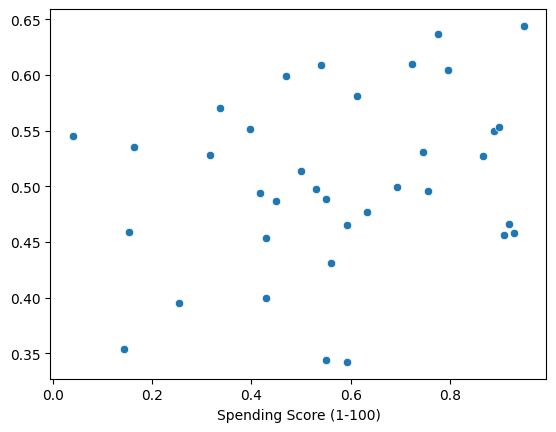

In [288]:
sns.scatterplot(x=y_test, y=y_pred)

In [289]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)
y_pred_tree = tree_regressor.predict(X_test)

In [290]:
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree Regression - MAE: {mae_tree}, MSE: {mse_tree}, R²: {r2_tree}')

Decision Tree Regression - MAE: 0.1765873015873016, MSE: 0.0722413114905826, R²: -0.20737661333204405


<Axes: xlabel='Spending Score (1-100)'>

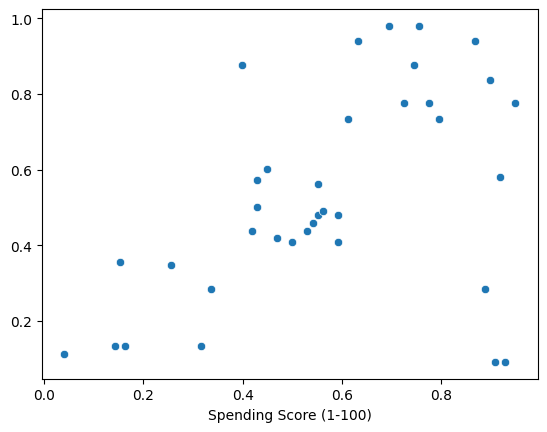

In [291]:
sns.scatterplot(x=y_test, y=y_pred_tree)

In [292]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
forest_regressor.fit(X_train, y_train)

# Make predictions
y_pred_forest = forest_regressor.predict(X_test)

# Evaluate the model
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f'Random Forest Regression - MAE: {mae_forest}, MSE: {mse_forest}, R²: {r2_forest}')

Random Forest Regression - MAE: 0.133828373015873, MSE: 0.04295787625630845, R²: 0.28204051006133735


<Axes: xlabel='Spending Score (1-100)'>

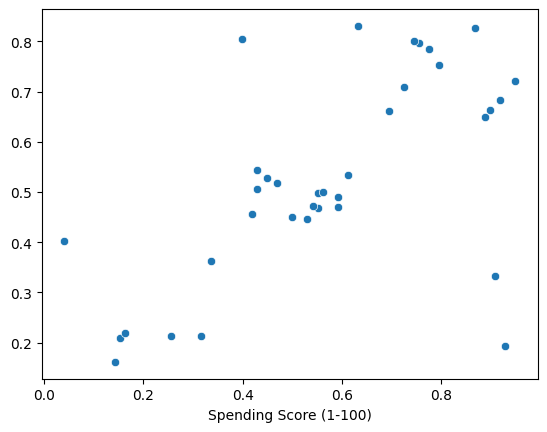

In [293]:
sns.scatterplot(x=y_test, y=y_pred_forest)